# Traffic flow

## Problem formulation
* $V\rightarrow$ speed of traffic
* $\rho\rightarrow$ traffic density (number of cars per unity length)
* $F\rightarrow$ flow rate, cars per hour
\begin{eqnarray}
\rho\rightarrow 0,V\rightarrow V_\text{max}\\
\rho\rightarrow \rho_\text{max},V\rightarrow 0
\end{eqnarray}
One possible equation to describe this behavior is
\begin{equation}
V=V_\text{max}\left(1−\rho/\rho_\text{max}\right)
\end{equation}
If we describe the **traffic flux**, $F$ as
\begin{equation}
F=V\rho
\end{equation}
then
\begin{equation}
F=F(\rho)=V(\rho)\rho=V_\text{max}\rho\left(1−\rho/\rho_\text{max}\right)
\end{equation}
Unsteady traffic flow can be modelled as the non-linear convection of car density, so we apply the non-linear convection equation with the **wave speed equal to** $\partial F/\partial \rho$:
\begin{equation}
\frac{\partial \rho}{\partial t}+\frac{\partial F}{\partial \rho}\frac{\partial \rho}{\partial x}=0
\end{equation}
Applying the chain rule of calculus, this becomes
\begin{equation}
\frac{\partial \rho}{\partial t}+\frac{\partial F}{\partial x}=0
\end{equation}
where $F$ is defined as above.

## Numerical formulation

#### Wave speed
\begin{equation}
c=\frac{\partial F}{\partial \rho}=V_\text{max}\left(1-\frac{2\rho}{\rho_\text{max}}\right)
\end{equation}
#### Backward difference in space
\begin{equation}
\frac{\partial \rho}{\partial x}\left(x_i,t^n\right)\approx \frac{\rho_i^n-\rho_{i-1}^n}{\Delta x}
\end{equation}
#### Forward difference in time
\begin{equation}
\frac{\partial \rho}{\partial t}\left(x_i,t^n\right)\approx \frac{\rho_i^{n+1}-\rho_i^n}{\Delta t}
\end{equation}
#### Discretized equation
\begin{equation}
\frac{\rho_i^{n+1}-\rho_i^n}{\Delta t}+V_\text{max}\left(1-\frac{2\rho_i^n}{\rho_\text{max}}\right)\frac{\rho_i^n-\rho_{i-1}^n}{\Delta x}=0
\end{equation}
\begin{equation}
\rho_i^{n+1}=\rho_i^n-V_\text{max}\left(1-\frac{2\rho_i^n}{\rho_\text{max}}\right)\left(\rho_i^n-\rho_{i-1}^n\right)\frac{\Delta t}{\Delta x}
\end{equation}
#### CFL condition
What is the CFL condition for the above equation? I think the starting point is the following:
\begin{equation}
1-V_\text{max}\left(1-\frac{2\rho_i^n}{\rho_\text{max}}\right)\frac{\Delta t}{\Delta x}\geq 0
\end{equation}

However, there are two problemas here:
1. $\rho >\rho_\text{max}/2\rightarrow c<0$, that is, the wave speed becomes negative and a backward in space numerical scheme is not able the handle that. **Fortunately, the setup stated on the assessment does not touch that aspect.**
2. If $\rho \leq\rho_\text{max}/2\rightarrow c\geq 0$ then
\begin{equation}
\sigma=\max\left[V_\text{max}\left(1-\frac{2\rho_i^n}{\rho_\text{max}}\right)\frac{\Delta t}{\Delta x}\right]\leq 1
\end{equation}
which occurs when $\rho_i^n=0.0$ and $\Delta t$ can be adjusted accordingly to $\Delta x$.

In [1]:
import numpy       
import math
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

dt =  0.001 .  50 time steps.


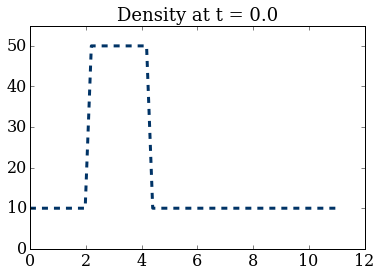

In [2]:
# Divide o intervalo espacial em nx-1 segmentos.
L      = 11   # km
Vmax   = 80   # km/h
rhomax = 250  # carros/km
tt     = 0.05  # 3 min
#tt     = 0.1   # 6 min

nx = 51
dt = .001     # h
nt = int(math.floor(tt/dt))
print("dt = ", dt, ". ", nt, "time steps.")
dx = L/(nx-1)    
x  = numpy.linspace(0,L,nx)
rho = numpy.ones(nx)*10.
rho[10:20] = 50.
# Esta e´a maneira correta de fatiar o array. Indexar diretamente o array com formulas
# deve garantir que o resultado sera sempre inteiro.
#lbound = numpy.where(x >= 2.0) 
#ubound = numpy.where(x <= 4.0)
#rho[numpy.intersect1d(lbound, ubound)]=50
pyplot.plot(x, rho, color='#003366', ls='--', lw=3)
pyplot.ylim(0,55);
pyplot.title("Density at t = 0.0", fontsize=18)

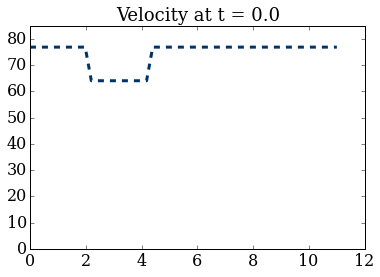

In [3]:
V = numpy.ones(nx)
V = Vmax*(1.-rho/rhomax)
pyplot.plot(x, V, color='#003366', ls='--', lw=3)
pyplot.ylim(0,85);
pyplot.title("Velocity at t = 0.0", fontsize=18)

In [4]:
print("Max V = %.2f km/h" % numpy.amax(V))
print("Min V = %.2f km/h" % numpy.amin(V))

Max V = 76.80 km/h
Min V = 64.00 km/h


In [5]:
print("Max V = %.2f m/s" % (numpy.amax(V)/3.6))
print("Min V = %.2f m/s" % (numpy.amin(V)/3.6))

Max V = 21.33 m/s
Min V = 17.78 m/s


In [6]:
rhon = numpy.ones(nx) # apenas para inicializar o array

for n in range(nt):  
    rhon = rho.copy() 
    rho[1:] = rhon[1:] -Vmax*(1.-2.*rhon[1:]/rhomax)*dt/dx*(rhon[1:] -rhon[0:-1]) 
    rho[0]  = 10.0    # C.C. Observe que so e' necessaria do lado esquerdo.

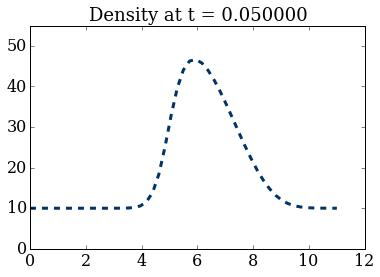

In [7]:
pyplot.plot(x, rho, color='#003366', ls='--', lw=3)
pyplot.ylim(0,55);
pyplot.title("Density at t = %f" %tt, fontsize=18)

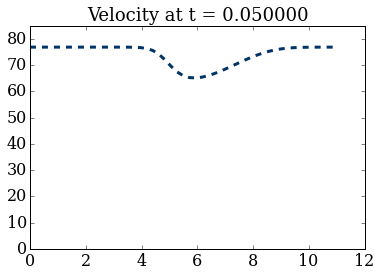

In [8]:
V = Vmax*(1.-rho/rhomax)
pyplot.plot(x, V, color='#003366', ls='--', lw=3)
pyplot.ylim(0,85);
pyplot.title("Velocity at t = %f" %tt, fontsize=18)

In [9]:
print("Max V = %.2f km/h" % numpy.amax(V))
print("Min V = %.2f km/h" % numpy.amin(V))
print("Ave V = %.2f km/h" % numpy.average(V))

Max V = 76.80 km/h
Min V = 65.07 km/h
Ave V = 74.02 km/h


In [10]:
print("Max V = %.2f m/s" % (numpy.amax(V)/3.6))
print("Min V = %.2f m/s" % (numpy.amin(V)/3.6))
print("Ave V = %.2f m/s" % (numpy.average(V)/3.6))

Max V = 21.33 m/s
Min V = 18.07 m/s
Ave V = 20.56 m/s


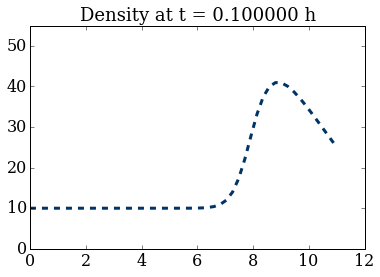

In [11]:
for n in range(nt):  
    rhon = rho.copy() 
    rho[1:] = rhon[1:] -Vmax*(1.-2.*rhon[1:]/rhomax)*dt/dx*(rhon[1:] -rhon[0:-1]) 
    rho[0]  = 10.0    # C.C. Observe que so e' necessaria do lado esquerdo.
pyplot.plot(x, rho, color='#003366', ls='--', lw=3)
pyplot.ylim(0,55);
pyplot.title("Density at t = %f h" %(2*tt), fontsize=18)

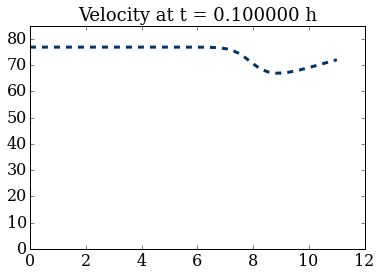

In [12]:
V = Vmax*(1.-rho/rhomax)
pyplot.plot(x, V, color='#003366', ls='--', lw=3)
pyplot.ylim(0,85);
pyplot.title("Velocity at t = %f h" %(2*tt), fontsize=18)

In [13]:
print("Max V = %.2f m/s" % (numpy.amax(V)/3.6))
print("Min V = %.2f m/s" % (numpy.amin(V)/3.6))
print("Ave V = %.2f m/s" % (numpy.average(V)/3.6))

Max V = 21.33 m/s
Min V = 18.58 m/s
Ave V = 20.65 m/s
